In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

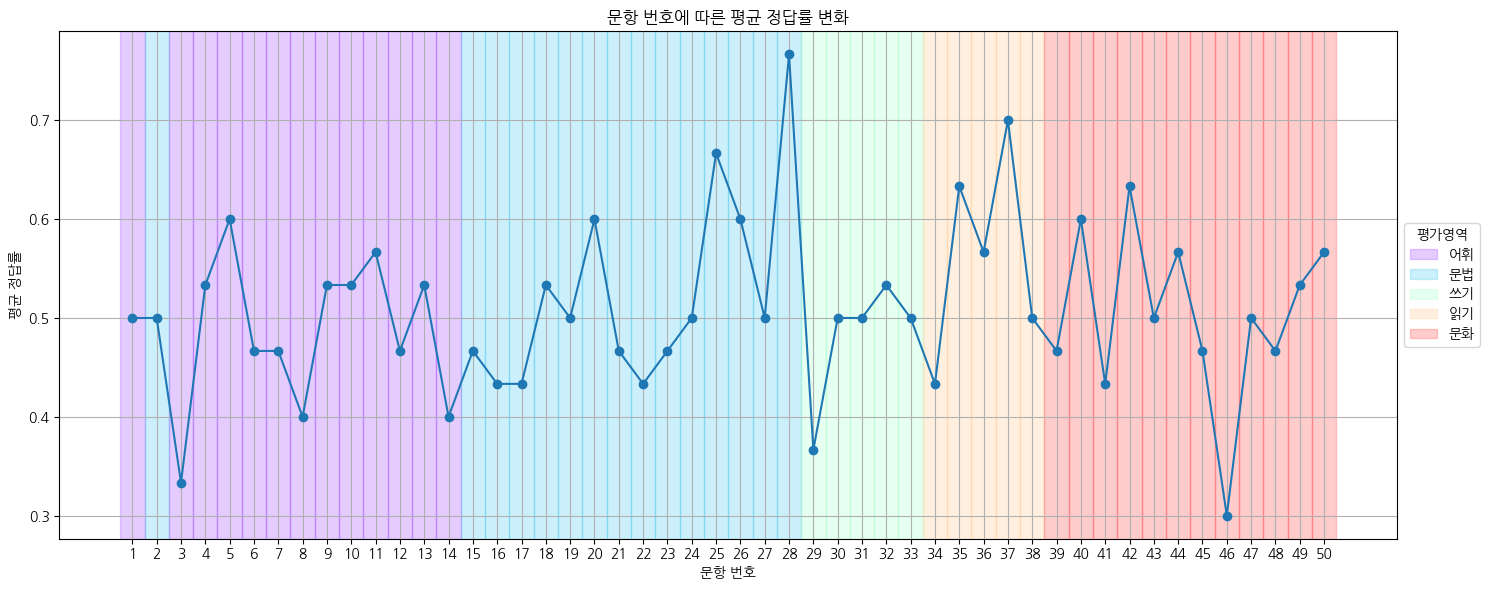

'\n# 소요 시간 데이터가 있다고 가정\nif \'소요시간\' in df_responses.columns:\n    average_time = df_responses[\'소요시간\'].mean()\n\n    plt.figure(figsize=(15, 6))\n    plt.plot(range(1, len(average_time) + 1), average_time, marker=\'o\')\n    plt.title(\'문항 번호에 따른 평균 소요 시간 변화\')\n    plt.xlabel(\'문항 번호\')\n    plt.ylabel(\'평균 소요 시간 (초)\')\n    plt.xticks(range(1, len(average_time) + 1))\n    plt.grid(True)\n\n    # 평가영역별로 색상 구분\n    for i, area in enumerate(areas):\n        plt.axvspan(i+0.5, i+1.5, alpha=0.2, color=area_color_map[area])\n\n    # 범례 추가\n    plt.legend(handles, area_color_map.keys(), title=\'평가영역\', loc=\'center left\', bbox_to_anchor=(1, 0.5))\n\n    plt.tight_layout()\n    plt.show()\nelse:\n    print("소요 시간 데이터가 제공되지 않았습니다.")\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드
df_questions = pd.read_csv('../exam1.csv')
# 수험자응답정보
df_responses = pd.read_csv('../응답_데이터.csv')
# 문항IRT 분석정보
df_irt = pd.read_csv('../문항_매개변수.csv')
# 수험자 능력정보
df_ability = pd.read_csv('../수험생_능력_추정치.csv')

# 1. 문항 번호에 따른 평균 정답률 변화 선 그래프

# OX리스트를 각 문항별로 분리하여 정답률 계산
def calculate_correct_rate(ox_string):
    return [1 if x == 'O' else 0 for x in ox_string]

correct_rates = df_responses['OX리스트'].apply(calculate_correct_rate)
correct_rates_df = pd.DataFrame(correct_rates.tolist())

# 각 문항별 평균 정답률 계산
average_correct_rates = correct_rates_df.mean()

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(average_correct_rates) + 1), average_correct_rates, marker='o')
plt.title('문항 번호에 따른 평균 정답률 변화')
plt.xlabel('문항 번호')
plt.ylabel('평균 정답률')
plt.xticks(range(1, len(average_correct_rates) + 1))
plt.grid(True)

# 평가영역별로 색상 구분
areas = df_questions['평가영역']
unique_areas = areas.unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_areas)))
area_color_map = dict(zip(unique_areas, colors))

for i, area in enumerate(areas):
    plt.axvspan(i+0.5, i+1.5, alpha=0.2, color=area_color_map[area])

# 범례 추가
handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.2) for color in area_color_map.values()]
plt.legend(handles, area_color_map.keys(), title='평가영역', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# 2. 문항 번호에 따른 평균 소요 시간 변화 선 그래프 (데이터 있을 경우)
"""
# 소요 시간 데이터가 있다고 가정
if '소요시간' in df_responses.columns:
    average_time = df_responses['소요시간'].mean()

    plt.figure(figsize=(15, 6))
    plt.plot(range(1, len(average_time) + 1), average_time, marker='o')
    plt.title('문항 번호에 따른 평균 소요 시간 변화')
    plt.xlabel('문항 번호')
    plt.ylabel('평균 소요 시간 (초)')
    plt.xticks(range(1, len(average_time) + 1))
    plt.grid(True)

    # 평가영역별로 색상 구분
    for i, area in enumerate(areas):
        plt.axvspan(i+0.5, i+1.5, alpha=0.2, color=area_color_map[area])

    # 범례 추가
    plt.legend(handles, area_color_map.keys(), title='평가영역', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()
else:
    print("소요 시간 데이터가 제공되지 않았습니다.")
"""